Q1. Solve the given 0/1 knapsack problem by considering the following points:
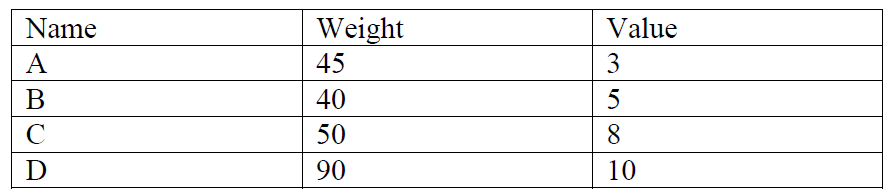

Chromosome is a 4-bit string. – {xA xB xC xD}
Population size = 4, Maximum Capacity of the bag (W) = 100.
First two fittest chromosomes selected as it is. 3rd and 4th fittest use for one-point crossover in the middle followed by single bit mutation of first offspring.
Bits chosen for mutation follows this cyclic order (xD, xC, xB, xA).
Initial population: {1 1 1 1, 1 0 0 0, 1 0 1 0, 1 0 0 1}.
Output the result after 10 iterations.

In [3]:
import sys
import numpy as np
import random
import math
import copy

weight = [45,40,50,90]
value = [3,5,8,10]
population = [[1,1,1,1],[1,0,0,0],[1,0,1,0],[1,0,0,1]]
capacity = 100

def calculate_weight_value(chrm):
    vall = 0
    wt = 0
    global value
    global weight
    
    for i in range(len(chrm)):
        if chrm[i] == 1:
            vall += value[i]
            wt += weight[i]
    return [wt,vall]


def crossover():
    
    global population
    if len(population) > 1:
        chosen_chrm_1 = population[-1][1]
        chosen_chrm_2 = population[-2][1]
    pt = int(math.ceil(len(chosen_chrm_1)/2))

    child_1 = copy.deepcopy(chosen_chrm_1)
    child_2 = copy.deepcopy(chosen_chrm_2)
    
    child_1[pt:] = chosen_chrm_2[pt:]
    child_2[pt:] = chosen_chrm_1[pt:]
    
    ans_1 = calculate_weight_value(child_1)
    ans_2 = calculate_weight_value(child_2)

    child_1 = [ans_1[1],child_1,ans_1[0]]
    child_2 = [ans_2[1],child_2,ans_2[0]]

    if child_1 not in population and child_1[2] < capacity:
      population += [child_1]
    if child_2 not in population and child_2[2] < capacity  :
      population += [child_2]

def mutate(m):
    chosen_chrm = population[0][1]
    child_chrm = copy.deepcopy(chosen_chrm)
    chosen_bit = 3 - (m%4)
    
    if child_chrm[chosen_bit] == 0:
        child_chrm[chosen_bit] = 1
        ans = calculate_weight_value(child_chrm)
        child_chrm = [ans[1]] + [child_chrm] + [ans[0]]
        
        if ans[0] < capacity and child_chrm not in population :
            chosen_chrm[chosen_bit] = 1
            population[0][0] = ans[1]
            population[0][2] = ans[0]
    else:
        child_chrm[chosen_bit] = 0
        ans = calculate_weight_value(child_chrm)
        child_chrm = [ans[1]] + [child_chrm] + [ans[0]]
        if ans[0] < capacity and child_chrm not in population :
            chosen_chrm[chosen_bit] = 0
            population[0][0] = ans[1]
            population[0][2] = ans[0]
            
    
def knapsack():

    global population
    
    weight_list = []
    val_list = []
    i = 0
    m = 0
    
    while i < len(population):
        ans = calculate_weight_value(population[i])
        if ans[0] > capacity:
            del population[i]
            continue
        population[i] = [ans[1],population[i],ans[0]] 
        i += 1
    while m < 10:
        
        population.sort()
        crossover()
        mutate(m)
        m += 1
    print("Best_solution is:-",population[-1][1],"having value =",population[-1][0],"and weight =",population[-1][2])
    

def main():
    
    knapsack()

if __name__ == "__main__":
    main()


Best_solution is:- [0, 1, 1, 0] having value = 13 and weight = 90


Q2. A thief enters a house for robbing it. He can carry a maximal weight of 9 kg into his bag. There are 4 items in the house with the following weights and values. The thief has to plan the items he should take to maximize the total value if he either takes the item completely or leaves it completely?

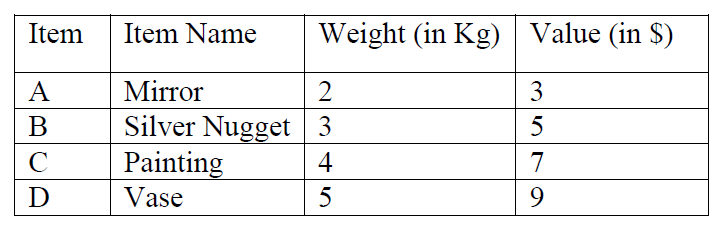

The problem is solved using Genetic Algorithm with population size 4 and each individual encoded as {XA, XB, XC, XD} where Xi ={0,1 } and i=A, B, C, D.
Consider initial population as 1111, 1000, 1010, and 1001.
Generate the population for next iteration as follows: Select the 1st and 2nd fittest individual as it is in the next iteration. Apply 1-point crossover in the middle between 3rd and 4th fittest chromosome followed by single bit mutation of first offspring (produced through crossover). Bit chosen for mutation follows this cyclic order {XC,XA,XD,XB}
Output the result after four iterations.

In [ ]:
import sys
import numpy as np
import random
import math
import copy

name = ['Mirror','Silver Nugget','Painting','Vase']
weight = [2,3,4,5]
value = [3,5,7,9]
population = [[1,1,1,1],[1,0,0,0],[1,0,1,0],[1,0,0,1]]
capacity = 9

def calculate_weight_value(chrm):
    vall = 0
    wt = 0
    global value
    global weight
    
    for i in range(len(chrm)):
        if chrm[i] == 1:
            vall += value[i]
            wt += weight[i]
    return [wt,vall]


def crossover():
    
    global population
    if len(population) > 1:
        chosen_chrm_1 = population[-1][1]
        chosen_chrm_2 = population[-2][1]
    pt = int(math.ceil(len(chosen_chrm_1)/2))

    child_1 = copy.deepcopy(chosen_chrm_1)
    child_2 = copy.deepcopy(chosen_chrm_2)
    
    child_1[pt:] = chosen_chrm_2[pt:]
    child_2[pt:] = chosen_chrm_1[pt:]
    
    ans_1 = calculate_weight_value(child_1)
    ans_2 = calculate_weight_value(child_2)

    child_1 = [ans_1[1],child_1,ans_1[0]]
    child_2 = [ans_2[1],child_2,ans_2[0]]

    
    if len(population) < 2:
        if child_1 not in population and child_1[2] < capacity:
            population += [child_1]
        if child_2 not in population and child_2[2] < capacity:
            population += [child_1]
            
    elif len(population) == 3:
        if child_1[2] < capacity and child_1[0] > child_2[0] and child_1 not in population:
            population += [child_1]
        elif child_2[2] < capacity and child_2 not in population:
            population += [child_2]
    else:
        lst = [population[-1],population[-2],child_1,child_2]
        c = 0
        
        if lst[0] not in population and lst[0][2] < capacity:
            population += [lst[0]]
            c += 1
        if lst[1] not in population and lst[1][2] < capacity:
            population += [lst[1]]
            c += 1

        if c < 2 and lst[2] not in population and lst[2][2] < capacity:
            population += [lst[2]]
            c += 1
            
        if c < 2 and lst[3] not in population and lst[3][2] < capacity:
            population += [lst[3]]           




def mutate(m):
    chosen_chrm = population[0][1]
    child_chrm = copy.deepcopy(chosen_chrm)
    chosen_bit = m
    
    if child_chrm[chosen_bit] == 0:
        child_chrm[chosen_bit] = 1
        ans = calculate_weight_value(child_chrm)
        child_chrm = [ans[1]] + [child_chrm] + [ans[0]]
        
        if ans[0] < capacity and child_chrm not in population :
            chosen_chrm[chosen_bit] = 1
            population[0][0] = ans[1]
            population[0][2] = ans[0]
    else:
        child_chrm[chosen_bit] = 0
        ans = calculate_weight_value(child_chrm)
        child_chrm = [ans[1]] + [child_chrm] + [ans[0]]
        if ans[0] < capacity and child_chrm not in population :
            chosen_chrm[chosen_bit] = 0
            population[0][0] = ans[1]
            population[0][2] = ans[0]
            
    
def knapsack():

    global population
    
    weight_list = []
    val_list = []
    i = 0
    m = 0
    
    while i < len(population):
        ans = calculate_weight_value(population[i])
        if ans[0] > capacity:
            del population[i]
            continue
        population[i] = [ans[1],population[i],ans[0]] 
        i += 1
    mut = [2,0,3,1]
    j = 0
    while j < 4:
        m = 3 - (j%4)
        population.sort()
        crossover()
        
        mutate(mut[m])
        j += 1
    print("Best_solution after 4 iterations is:",population[-1][1],"having value =",population[-1][0],"and weight =",population[-1][2])
    

def main():
    
    knapsack()

if __name__ == "__main__":
    main()


Best_solution after 4 iterations is: [1, 0, 0, 1] having value = 12 and weight = 7


Q3. Consider the following 2-SAT problem with 4 Boolean variables a, b, c, d:
F=(¬a∨d)∧(c∨b) ∧ ( ¬c∨¬d) ∧ ( ¬d∨¬b) ∧ (¬a∨¬d)
The MOVEGEN function to generate new solution be arbitrary changing value of any one variable
Let the candidate solution be of the order (abcd) and the initial candidate solution be (1111).
Let heuristic to evaluate each solution be number of clauses satisfied in the formula.
Apply Simulated Annealing (Consider T= 500 and cooling function = T-50)
(Assume the following 3 random numbers:0.655,0.254.0.432)
Accept every good move and accept a bad move if probability is greater than 50%.

In [ ]:
import sys
import random
import copy
import math

random.seed(8)
T = 5000


def heuristic(sol):
    
    a,b,c,d = sol    
    f = [[not a or d] , [c or b], [not c or not d] , [not d or not b] , [not a or not d]]
    F = f[0] and f[1] and f[2] and f[3] and f[4]
    
    c = 0
    for i in range(len(f)):
        if f[i][0] == True:
            c += 1
    return c


def movegen(parent):
    
    random_index = random.randint(0,3)
    child = copy.deepcopy(parent)
    if parent[random_index] == 1:
        child[random_index] = 0
    else:
        child[random_index] = 1        
    return child


def sigmoid_with_temp(delta_e):
    
    global T
    prob = 1 / (1 + math.exp((-delta_e)/T))
    return prob
    
def calculate_delta_e(parent,child):
    
    delta_e = float(heuristic(child) - heuristic(parent))
    return delta_e
    

def sampling(prob):
    ans = random.uniform(0,1)
    if ans >= prob:
        return 1
    else:
        return 0

    
def search(initial_sol,f,F):
    
    global T
    parent = initial_sol
    curr_max = heuristic(initial_sol)
    count = 0
    sol_list = []
    while count < 100:
        m = 0
        while m < 5:
            
            child = movegen(parent)
            delta_e = calculate_delta_e(parent,child)
            
            if delta_e >= 0:
                break
            prob = sigmoid_with_temp(delta_e)
            
            ans = sampling(prob)
            if ans == 1:
                m = 0
                break
            else:
                m += 1

        if heuristic(child) == 5:
            if child not in sol_list:
                sol_list += [child]
            
        
        if heuristic(child) > curr_max:
            optimal_child = child
            curr_max = heuristic(child)
        parent = child
        
        a,b,c,d = parent
    
        T = T - 50
        if T <= 0:
            T = 1
        
        count += 1
    if len(sol_list) == 0:
        print("optimal sol:",optimal_child)
    else:
        print("solutions are:",sol_list)
    
def main():
    
    initial_sol = [1,1,1,1]
    a,b,c,d = initial_sol
    f = [[not a or d] , [c or b], [not c or not d] , [not d or not b] , [not a or not d]]
    F = f[0] and f[1] and f[2] and f[3] and f[4]
    search(initial_sol,f,F)
    

if __name__ == "__main__":
     main()


solutions are: [[0, 1, 0, 0], [0, 0, 1, 0], [0, 1, 1, 0]]



Q4. For the given problem generate a plan:

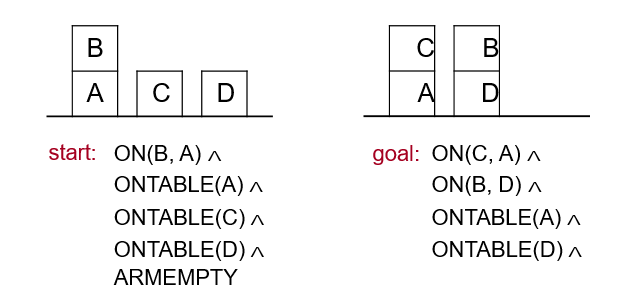

Store the generated plan in a text file.